In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/WineData.csv")
df.head()

,ID,Brand,FA,VA,CA,RS,chloride,FSD,TSD,density,pH,sulphate,alcohol
0,1,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,Seagram,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,Seagram,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,Sula Vineyards,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
count = 1
for i in df["Brand"].unique():
    df.loc[(df["Brand"] == i), "Brand"] = count
    count+=1

In [4]:
df["Brand"] = df["Brand"].astype("int8")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1599 non-null   int64  
 1   Brand     1599 non-null   int8   
 2   FA        1599 non-null   float64
 3   VA        1599 non-null   float64
 4   CA        1599 non-null   float64
 5   RS        1599 non-null   float64
 6   chloride  1599 non-null   float64
 7   FSD       1599 non-null   float64
 8   TSD       1599 non-null   float64
 9   density   1599 non-null   float64
 10  pH        1599 non-null   float64
 11  sulphate  1599 non-null   float64
 12  alcohol   1599 non-null   float64
dtypes: float64(11), int64(1), int8(1)
memory usage: 151.6 KB


In [6]:
df.pop("ID")

0          1
1          2
2          3
3          4
4          5
        ... 
1594    1595
1595    1596
1596    1597
1597    1598
1598    1599
Name: ID, Length: 1599, dtype: int64

In [7]:
df.head()

,Brand,FA,VA,CA,RS,chloride,FSD,TSD,density,pH,sulphate,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
y = np.array(df.pop("alcohol"))
X = np.array(df.copy())

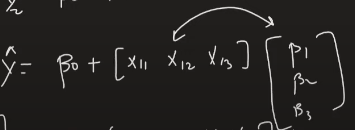

In [9]:
from IPython.display import clear_output

In [10]:
class MultiLinearRegressionBGD:
    def __init__(self, learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X.shape[1])
        mse = []
        
        for i in range(self.epochs):           
            
            # update all the coef and the intercept
            y_hat = np.dot(X,self.coef_) + self.intercept_
            
            mse.append(np.abs(np.mean(y-y_hat)))        
            
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y - y_hat),X)/X.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
            
        # Clear all outputs in the notebook
        clear_output(wait=True)
            
        plt.plot(mse)
            
        
    def predict(self, X):
        y_hat = self.intercept_ + np.dot(X,self.coef_)
        return y_hat.ravel()

In [42]:
from sklearn.linear_model import LinearRegression
mlrBGD = MultiLinearRegressionBGD(0.0001,300)
lr = LinearRegression()

CPU times: total: 15.6 ms
Wall time: 84.2 ms


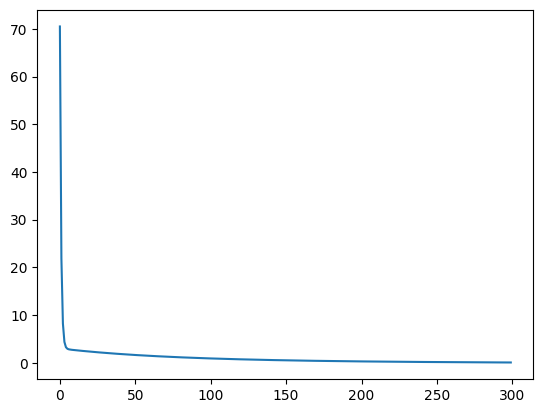

In [43]:
%%time
mlrBGD.fit(X,y)

In [44]:
%%time
lr.fit(X,y)

CPU times: total: 0 ns
Wall time: 9.2 ms


LinearRegression()

In [45]:
y_hat = mlrBGD.predict(X)
y_hat_lr = lr.predict(X)

In [46]:
y_hat

array([ 9.08861851,  9.45711153,  9.30222051, ...,  9.87837756,
        8.85160753, 10.73881996])

In [47]:
y_hat_lr

array([ 9.55277105,  9.51034599,  9.529343  , ..., 10.3180465 ,
       10.60368088, 10.68632127])

In [48]:
from sklearn.metrics import r2_score

r2_score(y,y_hat)

-1.4105289561441086

In [49]:
r2_score(y,y_hat_lr)

0.6766614705735856

In [50]:
np.mean(np.abs((y-y_hat)**2))

2.735798915324524

In [51]:
np.mean(np.abs((y-y_hat_lr)**2))

0.3669689160267976